In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000,high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

## Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
    

636

In [6]:
import requests

In [7]:
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):
    
#     # Group cities in sets of 50 for logging purposes.
#     if(i % 50 == 0 and i>= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]    

In [12]:
# Loop through all the cities in our list.
#for i, item in enumerate(list):
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 == 0 and i>= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")  
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping ....")
        pass
        
    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
    

Processing Record 1 of Set 1 | sola
Processing Record 2 of Set 1 | bambanglipuro
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | kaeo
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | ponta do sol
Processing Record 9 of Set 1 | makung
City not found. Skipping ....
Processing Record 10 of Set 1 | longhua
Processing Record 11 of Set 1 | alofi
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping ....
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | krasnoznamensk
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | tondano
Processing Record 19 of Set 1 | kamenskoye
City not found. Skipping ....
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | fortuna
Processing Rec

Processing Record 42 of Set 4 | lorengau
Processing Record 43 of Set 4 | lovozero
Processing Record 44 of Set 4 | brookhaven
Processing Record 45 of Set 4 | mayo
Processing Record 46 of Set 4 | dakar
Processing Record 47 of Set 4 | pedernales
Processing Record 48 of Set 4 | tarata
Processing Record 49 of Set 4 | ginir
Processing Record 50 of Set 4 | meyungs
City not found. Skipping ....
Processing Record 1 of Set 5 | yulara
Processing Record 2 of Set 5 | namatanai
Processing Record 3 of Set 5 | ust-ishim
Processing Record 4 of Set 5 | nalut
Processing Record 5 of Set 5 | sirfa
City not found. Skipping ....
Processing Record 6 of Set 5 | lavrentiya
Processing Record 7 of Set 5 | cap-aux-meules
Processing Record 8 of Set 5 | novikovo
Processing Record 9 of Set 5 | lashio
Processing Record 10 of Set 5 | santa rosa
Processing Record 11 of Set 5 | gavle
Processing Record 12 of Set 5 | carnarvon
Processing Record 13 of Set 5 | kawana waters
City not found. Skipping ....
Processing Record 14 

Processing Record 32 of Set 8 | el tocuyo
Processing Record 33 of Set 8 | inderborskiy
City not found. Skipping ....
Processing Record 34 of Set 8 | fairbanks
Processing Record 35 of Set 8 | saldanha
Processing Record 36 of Set 8 | biaora
Processing Record 37 of Set 8 | kavaratti
Processing Record 38 of Set 8 | tabiauea
City not found. Skipping ....
Processing Record 39 of Set 8 | lyskovo
Processing Record 40 of Set 8 | kapustin yar-1
City not found. Skipping ....
Processing Record 41 of Set 8 | nome
Processing Record 42 of Set 8 | korla
Processing Record 43 of Set 8 | ust-kuyga
Processing Record 44 of Set 8 | hermiston
Processing Record 45 of Set 8 | plaisance-du-touch
Processing Record 46 of Set 8 | sisimiut
Processing Record 47 of Set 8 | kantunilkin
Processing Record 48 of Set 8 | hami
Processing Record 49 of Set 8 | ous
Processing Record 50 of Set 8 | cavalcante
Processing Record 1 of Set 9 | baoning
Processing Record 2 of Set 9 | okha
Processing Record 3 of Set 9 | muisne
Process

Processing Record 16 of Set 12 | saint-georges
Processing Record 17 of Set 12 | nantucket
Processing Record 18 of Set 12 | haapiti
Processing Record 19 of Set 12 | saint-francois
Processing Record 20 of Set 12 | hoa binh
Processing Record 21 of Set 12 | seoul
Processing Record 22 of Set 12 | havre-saint-pierre
Processing Record 23 of Set 12 | sept-iles
Processing Record 24 of Set 12 | inuvik
Processing Record 25 of Set 12 | macaboboni
City not found. Skipping ....
Processing Record 26 of Set 12 | vostok
Processing Record 27 of Set 12 | khonuu
City not found. Skipping ....
Processing Record 28 of Set 12 | nishihara
Processing Record 29 of Set 12 | hervey bay
Processing Record 30 of Set 12 | mitu
Processing Record 31 of Set 12 | monte escobedo
Processing Record 32 of Set 12 | nizwa
Processing Record 33 of Set 12 | muros
Processing Record 34 of Set 12 | santa fe
Processing Record 35 of Set 12 | prata
Processing Record 36 of Set 12 | meulaboh
Processing Record 37 of Set 12 | praia da vitor

In [13]:
len(city_data)

587

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sola,-13.8833,167.5500,81.41,77,21,15.86,VU,2021-10-24 06:32:11
1,Bambanglipuro,-7.9500,110.2833,84.20,68,58,11.61,ID,2021-10-24 06:32:11
2,Avarua,-21.2078,-159.7750,69.85,68,40,3.44,CK,2021-10-24 06:32:11
3,Kaeo,-35.1000,173.7833,64.33,97,9,5.35,NZ,2021-10-24 06:32:12
4,Bluff,-46.6000,168.3333,51.87,94,100,6.93,NZ,2021-10-24 06:32:12


In [15]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sola,VU,2021-10-24 06:32:11,-13.8833,167.5500,81.41,77,21,15.86
1,Bambanglipuro,ID,2021-10-24 06:32:11,-7.9500,110.2833,84.20,68,58,11.61
2,Avarua,CK,2021-10-24 06:32:11,-21.2078,-159.7750,69.85,68,40,3.44
3,Kaeo,NZ,2021-10-24 06:32:12,-35.1000,173.7833,64.33,97,9,5.35
4,Bluff,NZ,2021-10-24 06:32:12,-46.6000,168.3333,51.87,94,100,6.93


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

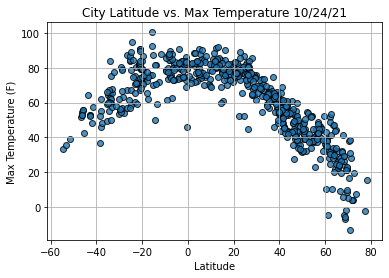

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

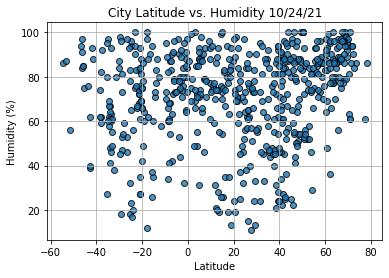

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

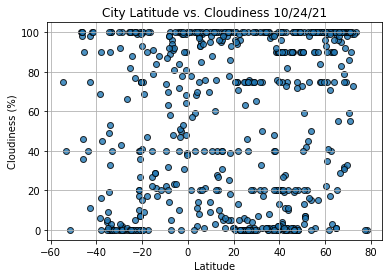

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

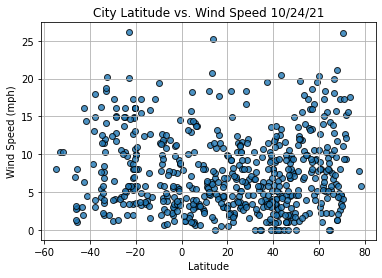

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope,intercept,r_value,p_value,std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values*slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()  

In [23]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
7,Ponta Do Sol,PT,2021-10-24 06:32:13,32.6667,-17.1000,70.43,64,17,7.63
8,Longhua,CN,2021-10-24 06:32:13,23.6137,114.1919,77.22,49,0,6.71
10,Longyearbyen,SJ,2021-10-24 06:32:14,78.2186,15.6401,15.64,86,0,5.75
11,Krasnoznamensk,RU,2021-10-24 06:32:14,55.5994,37.0386,40.69,87,90,13.42
14,Khatanga,RU,2021-10-24 06:32:15,71.9667,102.5000,4.19,90,73,15.23


In [24]:
north_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
south_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [25]:
# x_values = north_hemi_df["Lat"]
# y_values = south_hemi_df["Max Temp"]

# # Call the function.
# plot_linear_regression(x_values, y_values, "Linear Regression on Northern Hemisphere for Maximum Temperature",
#                        "Max Temp",(10,40))

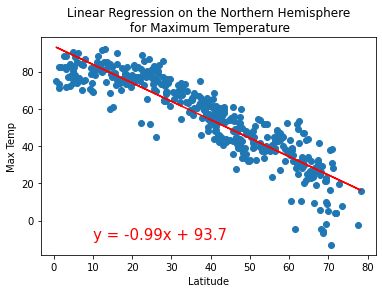

In [26]:
# Linear regression on the Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,-10))

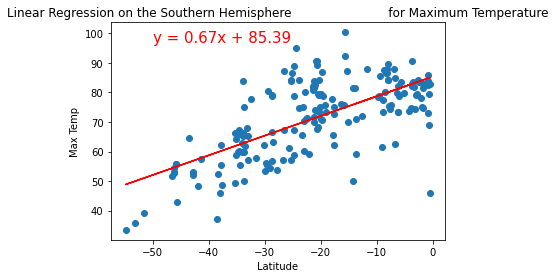

In [27]:
# Linear regression on the Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,97))

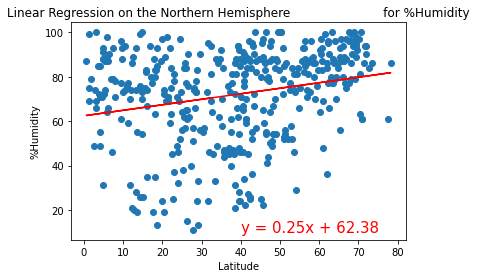

In [28]:
# Linear regression on the Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for %Humidity', '%Humidity',(40,10))

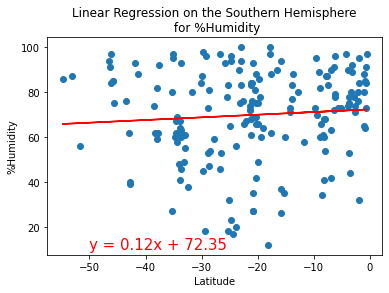

In [29]:
# Linear regression on the Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for %Humidity', '%Humidity',(-50,10))

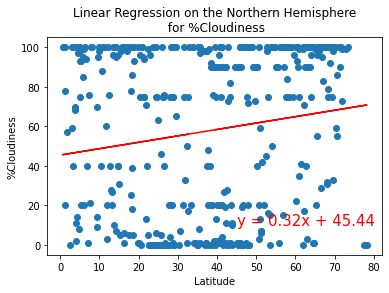

In [30]:
# Linear regression on the Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for %Cloudiness', '%Cloudiness',(45,10))

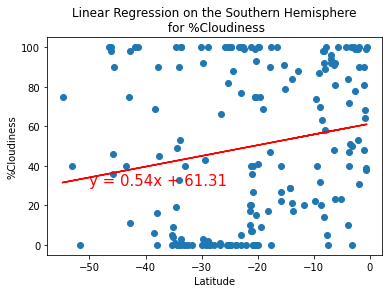

In [31]:
# Linear regression on the Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for %Cloudiness', '%Cloudiness',(-50,30))

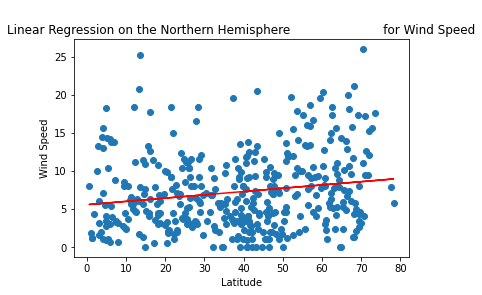

In [32]:
# Linear regression on the Northern Hemisphere
x_values = north_hemi_df["Lat"]
y_values = north_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for Wind Speed', 'Wind Speed',(45,30))

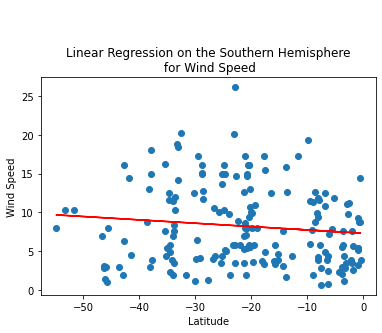

In [33]:
# Linear regression on the Southern Hemisphere
x_values = south_hemi_df["Lat"]
y_values = south_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed',(-50,35))